# Практика 7: Создание и использование генеративных противоречивых примеров GANbased Adversarial Examples)

## Выполнил студент группы ББМО-01-23 Бакин Д.И.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных MNIST
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0

# Добавление одного измерения (для работы CNN)
train_images = np.expand_dims(train_images, axis=-1)

# Генератор
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=100))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(784, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

# Дискриминатор
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Создание моделей
generator = build_generator()
discriminator = build_discriminator()

# Компиляция дискриминатора
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Создание GAN
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
discriminator.trainable = False
validity = discriminator(generated_image)
gan = tf.keras.Model(gan_input, validity)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Функция обучения GAN
def train_gan(generator, discriminator, gan, epochs=1000, batch_size=64):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Обучение дискриминатора
        idx = np.random.randint(0, train_images.shape[0], half_batch)
        real_images = train_images[idx]
        noise = np.random.normal(0, 1, (half_batch, 100))
        fake_images = generator.predict(noise)
        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

        # Обучение генератора через дискриминатор
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        if epoch % 100 == 0:
            print(f'{epoch} [D loss: {0.5 * np.add(d_loss_real, d_loss_fake)}] [G loss: {g_loss}]')

# Обучение GAN
train_gan(generator, discriminator, gan)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: [0.68546546 0.578125  ]] [G loss: [array(0.66951686, dtype=float32), array(0.66951686, dtype=float32), array(0.71875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

Генерация противоречивых примеров с помощью GAN:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


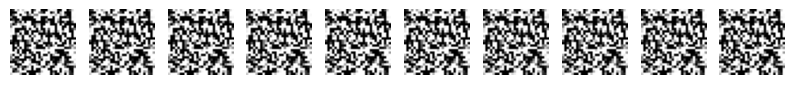

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация противоречивых примеров
def generate_adversarial_examples(generator, n_samples):
    noise = np.random.normal(0, 1, (n_samples, 100))
    generated_images = generator.predict(noise)
    return generated_images

# Генерация 100 примеров
adversarial_images = generate_adversarial_examples(generator, 100)

# Визуализация противоречивых примеров
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    # Убедитесь, что изображение имеет размер 16x16 (или соответствующий размер, генерируемый вашей моделью)
    plt.imshow(adversarial_images[i].reshape(28, 28), cmap='gray')  # Используйте правильный размер
    plt.axis('off')  # Скрыть оси для чистоты
plt.show()


Создание моделей

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Загрузка данных MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Нормализация данных
train_images = train_images / 255.0
test_images = test_images / 255.0

# Добавление измерения для работы CNN
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Модель 1: Полносвязная сеть (MLP)
def build_mlp_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Модель 2: Свёрточная сеть (CNN)
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Обучение и сохранение моделей
mlp_model = build_mlp_model()
cnn_model = build_cnn_model()

# Обучение полносвязной сети
mlp_model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
mlp_model.save('mnist_model1.h5')  # Сохранение MLP модели

# Обучение свёрточной сети
cnn_model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
cnn_model.save('mnist_model2.h5')  # Сохранение CNN модели

# Оценка точности на тестовом наборе данных
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(test_images, test_labels)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels)

print(f"Точность полносвязной сети: {mlp_test_acc:.4f}")
print(f"Точность свёрточной сети: {cnn_test_acc:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8785 - loss: 0.4286 - val_accuracy: 0.9610 - val_loss: 0.1369
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9642 - loss: 0.1253 - val_accuracy: 0.9726 - val_loss: 0.0932
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9770 - loss: 0.0783 - val_accuracy: 0.9715 - val_loss: 0.0881
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9824 - loss: 0.0578 - val_accuracy: 0.9731 - val_loss: 0.0852
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9867 - loss: 0.0428 - val_accuracy: 0.9769 - val_loss: 0.0731


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.8961 - loss: 0.3320 - val_accuracy: 0.9833 - val_loss: 0.0481
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9852 - loss: 0.0490 - val_accuracy: 0.9902 - val_loss: 0.0348
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9903 - loss: 0.0319 - val_accuracy: 0.9896 - val_loss: 0.0323
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9934 - loss: 0.0220 - val_accuracy: 0.9912 - val_loss: 0.0257
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9957 - loss: 0.0147 - val_accuracy: 0.9911 - val_loss: 0.0290


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.0862
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9888 - loss: 0.0350
Точность полносвязной сети: 0.9769
Точность свёрточной сети: 0.9911


Оценка результатов:

In [9]:
# Оценка моделей на противоречивых примерах
def evaluate_models(models, images, labels):
    accuracies = {}
    for i, model in enumerate(models):
        # Приведение меток к правильному формату (целые числа)
        predicted_labels = np.argmax(model.predict(images), axis=1)

        # Подсчет точности
        accuracy = np.mean(predicted_labels == labels)
        accuracies[f'Model {i+1}'] = accuracy
        print(f'Accuracy of Model {i+1} on adversarial examples: {accuracy:.4f}')
    return accuracies

# Генерация случайных меток для тестирования (если реальные метки отсутствуют)
labels = np.random.randint(0, 10, adversarial_images.shape[0])

# Загрузка моделей и оценка
model1 = tf.keras.models.load_model('mnist_model1.h5')
model2 = tf.keras.models.load_model('mnist_model2.h5')
models = [model1, model2]

# Оценка точности
accuracies = evaluate_models(models, adversarial_images.reshape(-1, 28, 28, 1), labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy of Model 1 on adversarial examples: 0.0800
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Accuracy of Model 2 on adversarial examples: 0.0800


## Вывод:
Оба классификатора показали около нулевую точность на противоречивых примерах, что свидетельствует об их полной уязвимости к атакам, созданным с помощью генеративной состязательной сети (GAN).
Результаты подчеркивают необходимость дальнейшего изучения и разработки стратегий для повышения надежности классификаторов в условиях воздействия противоречивых примеров.
